In [13]:
# importing the pandas and pyplot module from matplotlib library
import numpy as np,pandas as pd,matplotlib.pyplot as plt

In [4]:
# reading the dataset and creating dataframe 
data = pd.read_csv("C:/Users/DINAKAR/Downloads/Vayumithra_Assessment/Datasheet.csv" )

In [5]:
# preview the top 5 entities from the dataframe to understand the data
data.head()

,Turbine_ID,Timestamp,Gen_RPM_Avg,Gen_Bear_Temp_Avg,Gear_Oil_Temp_Avg,Rtr_RPM_Avg,Amb_WindSpeed_Avg,Amb_Temp_Avg,Blds_PitchAngle_Avg,Grd_Prod_Pwr_Avg
0,T09,2017-09-01T00:10:00+00:00,1261.6,44,48,11.1,5.4,26,-1.5,208.2
1,T07,2017-09-01T00:10:00+00:00,1261.9,48,50,11.2,5.2,26,-1.3,224.6
2,T01,2017-09-01T00:10:00+00:00,1309.3,45,50,11.6,5.8,26,-1.7,259.9
3,T11,2017-09-01T00:10:00+00:00,1254.7,46,51,11.1,5.5,26,-1.6,240.1
4,T06,2017-09-01T00:10:00+00:00,1262.9,49,51,11.2,5.5,26,-1.7,293.7


In [6]:
# conversion of timestamp from raw string to appropriate format and sorting for future calculation and plotting,
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
data = data.sort_values("Timestamp")

# understanding the information about each columns like dtype and non-null count
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 87639 entries, 0 to 87638
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Turbine_ID           87639 non-null  object             
 1   Timestamp            87639 non-null  datetime64[ns, UTC]
 2   Gen_RPM_Avg          87639 non-null  float64            
 3   Gen_Bear_Temp_Avg    87639 non-null  int64              
 4   Gear_Oil_Temp_Avg    87639 non-null  int64              
 5   Rtr_RPM_Avg          87639 non-null  float64            
 6   Amb_WindSpeed_Avg    87639 non-null  float64            
 7   Amb_Temp_Avg         87639 non-null  int64              
 8   Blds_PitchAngle_Avg  87639 non-null  float64            
 9   Grd_Prod_Pwr_Avg     87639 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), int64(3), object(1)
memory usage: 7.4+ MB


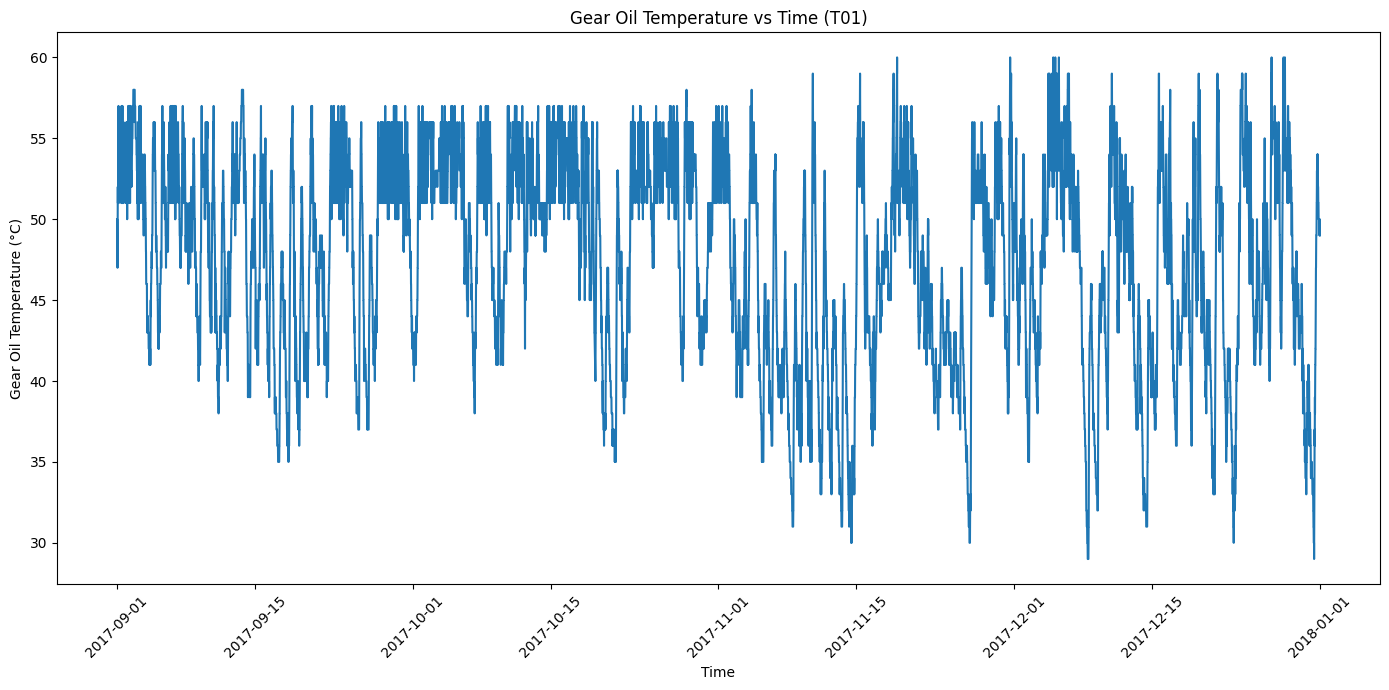

In [7]:
# 1) Early Failure Indicator Analysis 

# to extract the turbine id T01 for analysis
turbine_id = "T01"
turbine_data = data[data["Turbine_ID"] == turbine_id]

# plotting of Gear Oil Temperature vs Time for turbine id T01
plt.figure(figsize=(14,7))
plt.plot(turbine_data["Timestamp"], turbine_data["Gear_Oil_Temp_Avg"])
plt.xlabel("Time")
plt.ylabel("Gear Oil Temperature (°C)")
plt.title("Gear Oil Temperature vs Time (T01)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


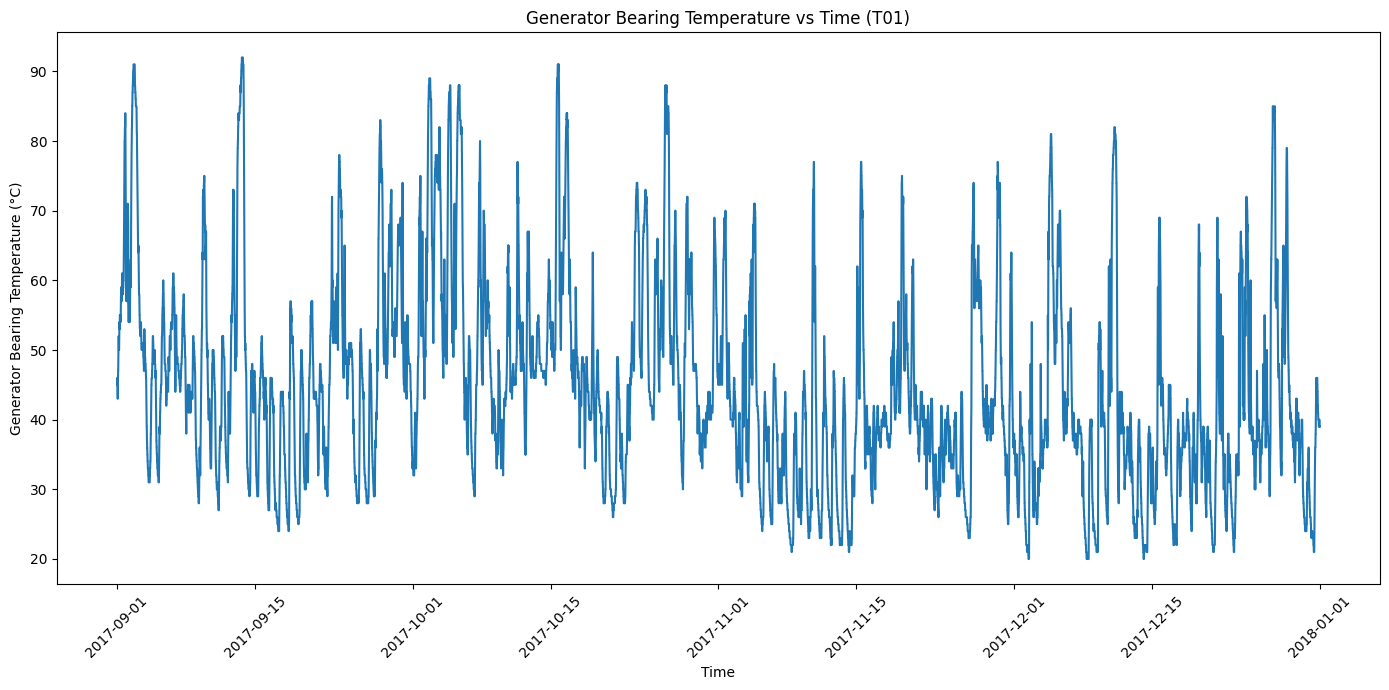

In [8]:
# plotting of Generator Bearing Temperature vs Time for turbine id T01

plt.figure(figsize=(14, 7))
plt.plot(turbine_data["Timestamp"], turbine_data["Gen_Bear_Temp_Avg"])
plt.xlabel("Time")
plt.ylabel("Generator Bearing Temperature (°C)")
plt.title(f"Generator Bearing Temperature vs Time ({turbine_id})")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



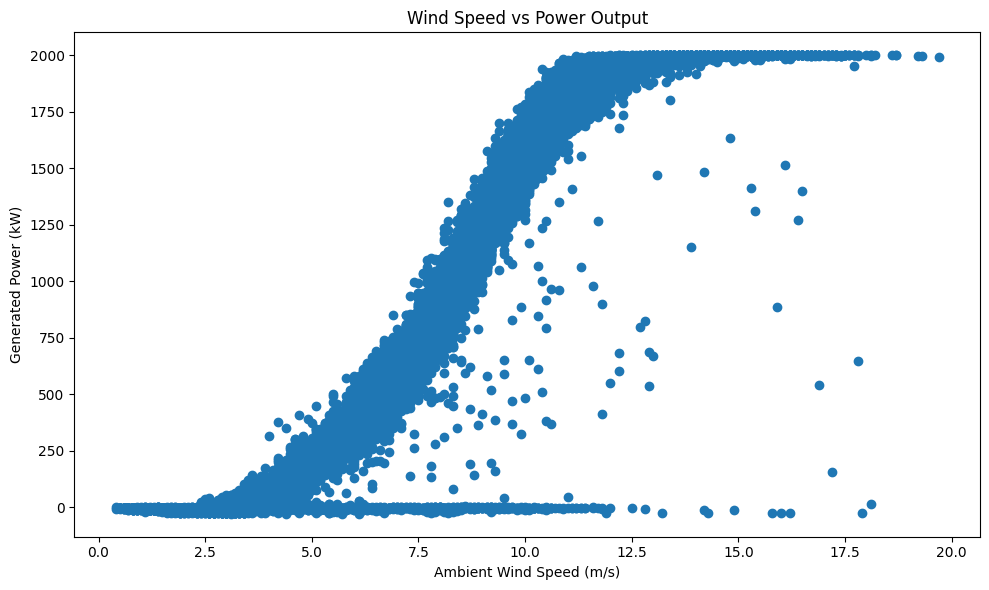

In [9]:
# 2) Anomaly Detection Using Scatter Plots 

# plotting of wind speed vs power output to find deviations 
plt.figure(figsize=(10, 6))
plt.scatter(data["Amb_WindSpeed_Avg"], data["Grd_Prod_Pwr_Avg"])
plt.xlabel("Ambient Wind Speed (m/s)")
plt.ylabel("Generated Power (kW)")
plt.title("Wind Speed vs Power Output")
plt.tight_layout()
plt.show()


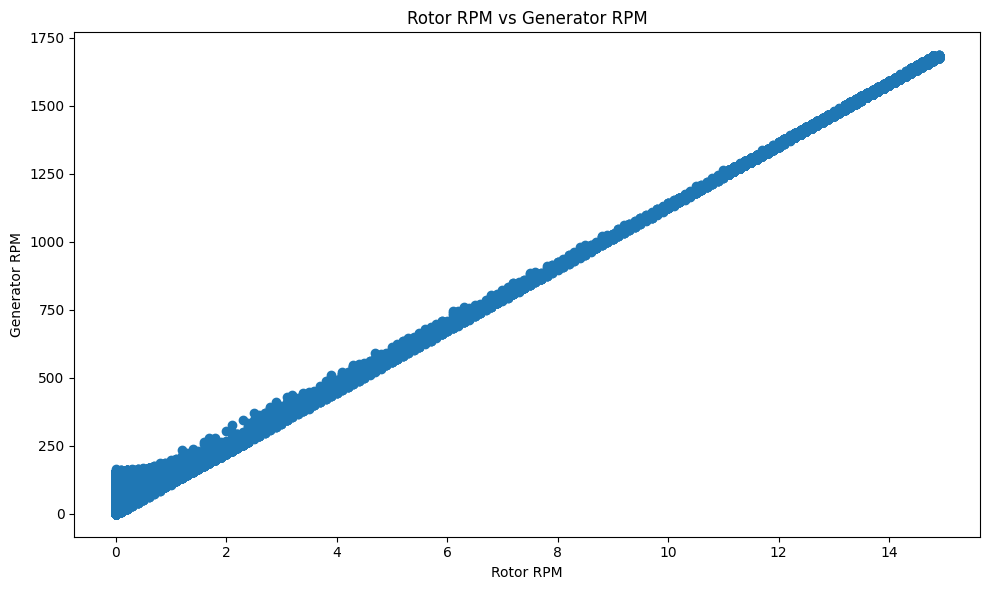

In [10]:
# 3) Operational Consistency Check 

# to verify the linear relationship between rotor and generator (RPM)
plt.figure(figsize=(10, 6))
plt.scatter(data["Rtr_RPM_Avg"], data["Gen_RPM_Avg"])
plt.xlabel("Rotor RPM")
plt.ylabel("Generator RPM")
plt.title("Rotor RPM vs Generator RPM")
plt.tight_layout()
plt.show()


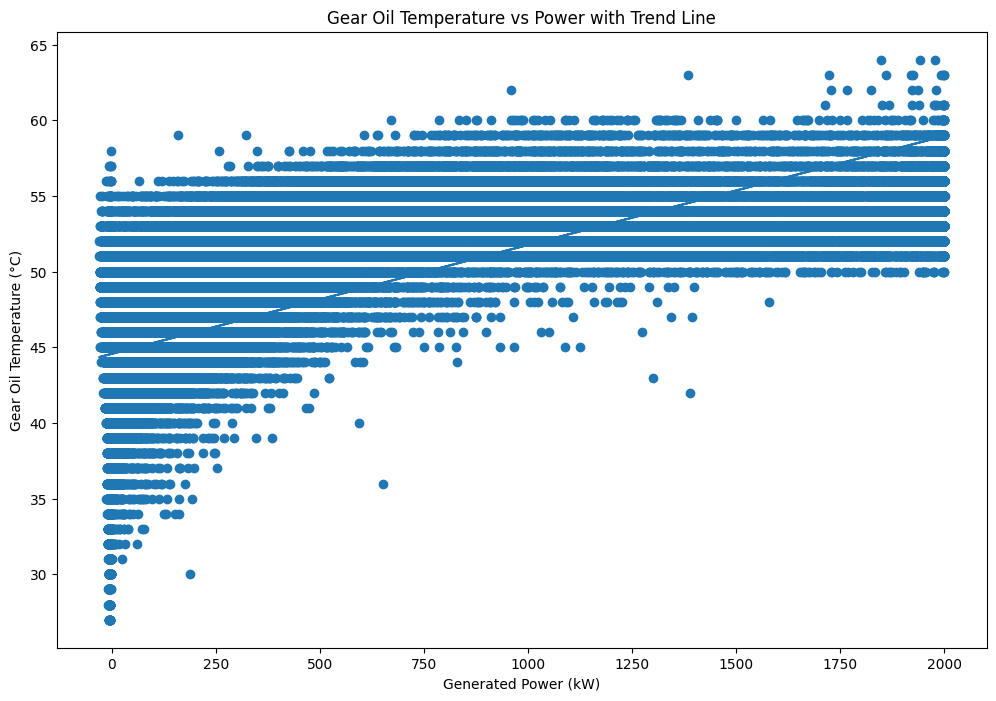

In [18]:
# 4) Predictive Trend Analysis

# Extract generated power values (independent variable)
x = data['Grd_Prod_Pwr_Avg']

# Extract gear oil temperature values (dependent variable)
y = data['Gear_Oil_Temp_Avg']

# Fit a first-order (linear) polynomial to the data
# This finds the best-fit straight line relating power and temperature
coeff = np.polyfit(x, y, 1)

# Create a polynomial function using the obtained coefficients
trend = np.poly1d(coeff)
plt.figure(figsize=(12, 8))
plt.scatter(x, y)
plt.plot(x, trend(x))
plt.xlabel("Generated Power (kW)")
plt.ylabel("Gear Oil Temperature (°C)")
plt.title("Gear Oil Temperature vs Power with Trend Line")
plt.show()

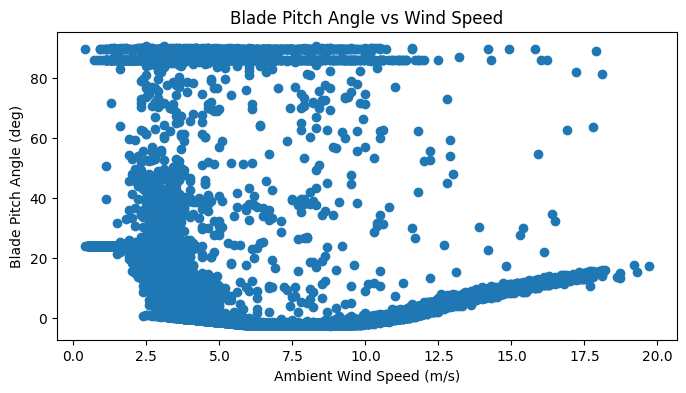

In [21]:
# 5) Blade Pitch Health Check

plt.figure(figsize=(8,4))
plt.scatter(data['Amb_WindSpeed_Avg'], data['Blds_PitchAngle_Avg'])
plt.xlabel("Ambient Wind Speed (m/s)")
plt.ylabel("Blade Pitch Angle (deg)")
plt.title("Blade Pitch Angle vs Wind Speed")
plt.show()